<a href="https://colab.research.google.com/github/tewei0328/AI/blob/master/%E5%96%AE%E5%85%836/6-2-2_%E7%95%AB%E8%82%A1%E5%83%B9K%E7%B7%9A%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1.資料讀入
import pandas as pd
df= pd.read_csv('k5b.csv') 

沒K線資料的人可由以下連結取得以上三個檔案:

https://drive.google.com/open?id=1IWref6PcdSwqX6f1ncbG0XwU5-y9Cnb3

In [0]:
#2.看一下資料內容
df.head()

,Date,Open,High,Low,Close
0,2018/12/28 13:45,9669,9671,9668,9669
1,2018/12/28 13:40,9679,9679,9668,9670
2,2018/12/28 13:35,9678,9680,9668,9679
3,2018/12/28 13:30,9666,9678,9664,9678
4,2018/12/28 13:25,9663,9666,9661,9666


In [0]:
#3.將日期設為資料索引
df.index=df['Date']

In [0]:
#調整資料時間反順序
df=df.iloc[::-1]

In [0]:
#調整欄位成, OHLC K線資料標準順序
#df=df.iloc[0:999,[0,1,4,2,3]]

In [0]:
#4.看一下資料長像
df.head()

,Date,Open,High,Low,Close
Date,,,,,
2018/12/28 01:40,2018/12/28 01:40,9566,9569,9562,9567
2018/12/28 01:45,2018/12/28 01:45,9567,9568,9561,9562
2018/12/28 01:50,2018/12/28 01:50,9563,9569,9560,9565
2018/12/28 01:55,2018/12/28 01:55,9565,9569,9563,9569
2018/12/28 02:00,2018/12/28 02:00,9569,9570,9565,9570


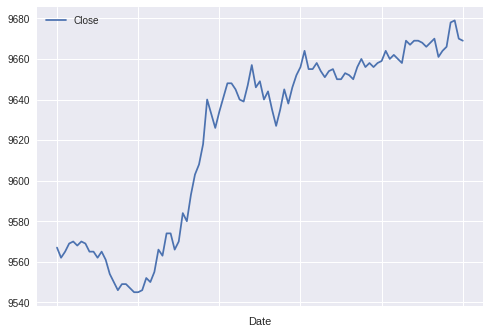

In [0]:
# 5. 畫出收盤線
df[['Close']].plot()

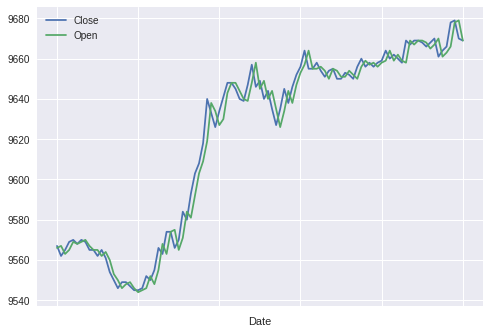

In [0]:
# 6. 畫出收開盤線
df[['Close', 'Open']].plot()

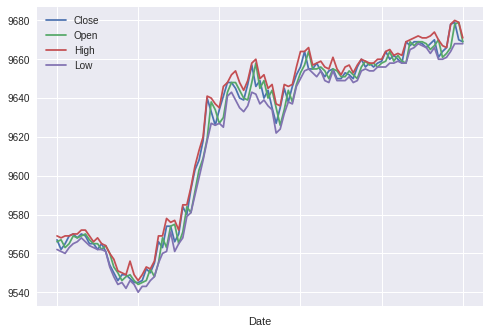

In [0]:
# 7.畫出收開高低線
df[['Close', 'Open', 'High', 'Low']].plot()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.finance as fplt
import datetime as dt

In [0]:
# K線畫圖指令只接受Numpy array為輸入資料
a=np.array(df[0:50])  # 將dataframe轉為numpy array

Python time strptime()方法

http://www.runoob.com/python/att-time-strptime.html

In [0]:
a[0][0]

'2018/12/28 01:40'

In [0]:
dt.datetime.strptime(a[0][0],"%Y/%m/%d %H:%M")

datetime.datetime(2018, 12, 28, 1, 40)

In [0]:
#看一下資料筆數
a.shape

(50, 5)

In [0]:
# 2. array的第一個時間資料為字串，得轉成canlestick_ochl能接受的數字型日期格式
for i in range(50):
  a[i][0]=fplt.date2num(dt.datetime.strptime(a[i][0],"%Y/%m/%d %H:%M"))
  a[i][0]=a[i][0]*1440/5

In [0]:
a

array([[212272148.00000003, 9566, 9569, 9562, 9567],
       [212272149.0, 9567, 9568, 9561, 9562],
       [212272150.0, 9563, 9569, 9560, 9565],
       [212272151.0, 9565, 9569, 9563, 9569],
       [212272152.0, 9569, 9570, 9565, 9570],
       [212272152.99999997, 9568, 9570, 9566, 9568],
       [212272154.0, 9569, 9572, 9568, 9570],
       [212272155.0, 9570, 9572, 9566, 9569],
       [212272156.0, 9567, 9569, 9564, 9565],
       [212272157.00000003, 9565, 9566, 9563, 9565],
       [212272158.0, 9565, 9568, 9562, 9562],
       [212272159.0, 9562, 9565, 9562, 9565],
       [212272160.0, 9564, 9564, 9561, 9561],
       [212272161.0, 9560, 9560, 9553, 9554],
       [212272161.99999997, 9553, 9557, 9548, 9550],
       [212272163.0, 9550, 9551, 9544, 9546],
       [212272164.0, 9546, 9550, 9545, 9549],
       [212272165.0, 9548, 9549, 9542, 9549],
       [212272166.00000003, 9549, 9556, 9546, 9547],
       [212272167.0, 9546, 9549, 9544, 9545],
       [212272168.0, 9544, 9546, 9540, 9545],

In [0]:
a[0][0]

212272148.00000003

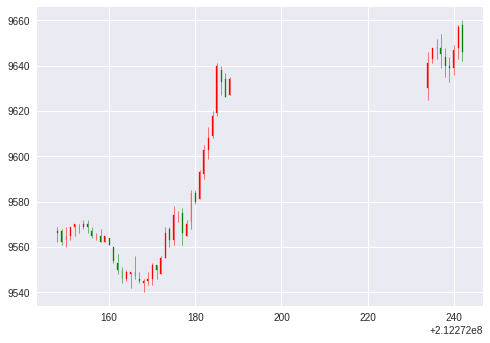

In [0]:
fig, ax=plt.subplots()
#ax.xaxis_date()
fplt.candlestick_ohlc(ax, a, colorup='r', colordown='g')
plt.show()